# Scatter Plots

Scatter plot adalah jenis grafik yang digunakan dalam statistik dan analisis data untuk menampilkan serta menganalisis hubungan antara dua variabel numerik. Grafik ini terdiri dari serangkaian titik di dalam koordinat kartesius, di mana setiap titik mewakili satu observasi atau data point.

## Setup the notebook

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Load and examine the data

Sama seperti sebelumnya, kita memuat dataset menggunakan perintah pd.read_csv dan dan menulis satu baris kode hanya dengan menggunakan nama dataset.

In [2]:
# Path of the file to read
insurance_filepath = "insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

1. `insurance_filepath = "insurance.csv"`: Baris ini mendefinisikan variabel bernama `insurance_filepath` dan memberikan nilai kepadanya. Variabel ini digunakan untuk menyimpan lokasi file yang akan dibaca. Dalam hal ini, file yang akan dibaca adalah "`insurance.csv`".
2. `insurance_data = pd.read_csv(insurance_filepath)`: Pada baris ini, kita menggunakan pustaka Pandas (Python Data Analysis Library) untuk membaca data dari file CSV. Berikut penjelasan lebih lanjut:
   * `pd`: Ini adalah alias untuk pustaka Pandas yang telah diimpor sebelumnya.
   * `read_csv`: Ini adalah fungsi yang digunakan untuk membaca data dari file CSV.
   * `insurance_filepath`: Ini adalah variabel yang berisi lokasi file CSV yang ingin dibaca (dalam hal ini, "`insurance.csv`").
3. Hasil Akhir: Setelah baris kode di atas dieksekusi, data dari file CSV "`insurance.csv`" akan berhasil dibaca dan disimpan dalam variabel `insurance_data`

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Scatter plots

Untuk membuat scatter plot sederhana, kita menggunakan sns.scatterplot sebagai perintah dan mendapatkan hasil sebagai berikut:

* garis horizontal x-axis (x=insurance_data['bmi']), dan
* garis vertical y-axis (y=insurance_data['charges']).

<Axes: xlabel='bmi', ylabel='charges'>

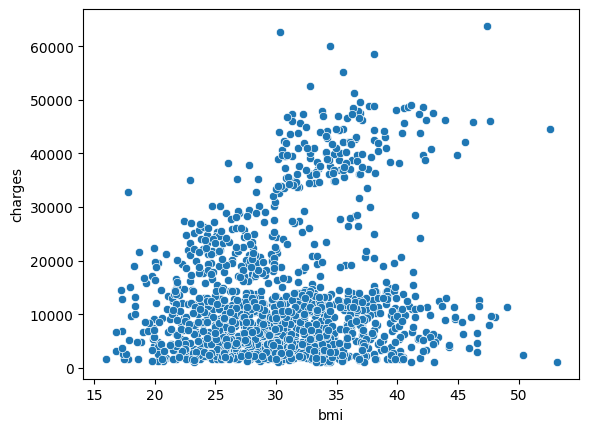

In [4]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

Scatter plot di atas menunjukkan bahwa indeks massa tubuh (BMI) dan biaya asuransi memiliki korelasi positif, di mana pelanggan dengan BMI yang lebih tinggi cenderung membayar lebih banyak dalam biaya asuransi. (Pola ini masuk akal, karena BMI tinggi biasanya terkait dengan risiko penyakit kronis yang lebih tinggi.)

Untuk memastikan kekuatan hubungan ini, Anda mungkin ingin menambahkan garis regresi, yaitu garis yang paling baik cocok dengan data. Ini dapat dilakukan dengan mengubah perintah menjadi sns.regplot.

<Axes: xlabel='bmi', ylabel='charges'>

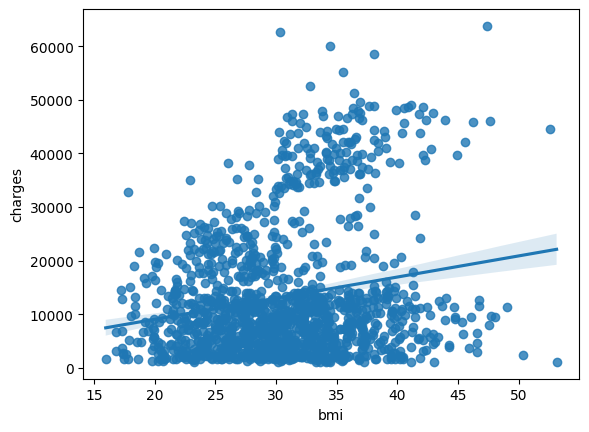

In [5]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

## Color-coded scatter plots

Kita dapat menggunakan scatter plot untuk menampilkan hubungan antara tiga variabel (bukan hanya dua!). Salah satu cara melakukannya adalah dengan mengkode-warnai titik-titik.

Sebagai contoh, untuk memahami bagaimana kebiasaan merokok memengaruhi hubungan antara indeks massa tubuh (BMI) dan biaya asuransi, kita dapat mengkode-warnai titik-titik berdasarkan status `‘smoker’`, dan memplot dua kolom lainnya (`‘bmi’`, `‘charges’`) pada sumbu-sumbu.

<Axes: xlabel='bmi', ylabel='charges'>

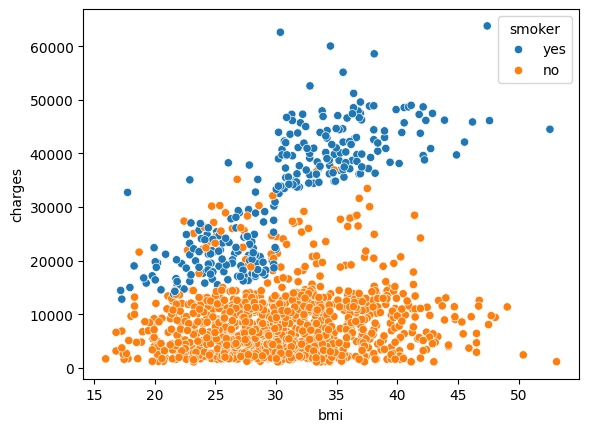

In [6]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

Scatter plot ini menunjukkan bahwa naperokok cenderung membayar sedikit lebih banyak dengan peningkatan BMI, sedangkan perokok membayar JAUH lebih banyak.

Untuk lebih menekankan fakta ini, kita dapat menggunakan perintah `sns.lmplot` untuk menambahkan dua garis regresi, yang sesuai dengan perokok dan bukan perokok. (Anda akan melihat bahwa garis regresi untuk perokok memiliki kemiringan yang jauh lebih curam, dibandingkan dengan garis untuk bukan perokok!)

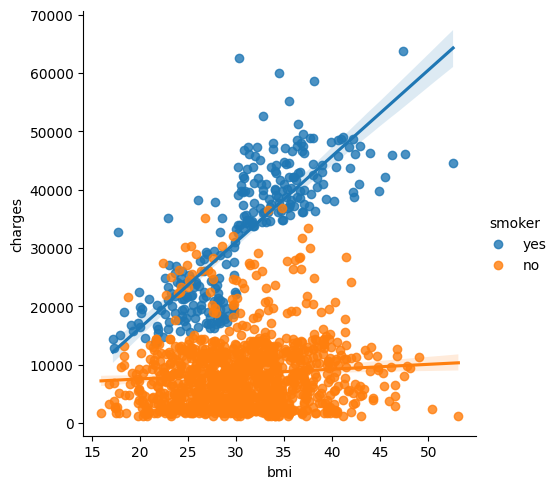

In [7]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

Perintah `sns.lmplot` di atas bekerja sedikit berbeda dari perintah yang telah Anda pelajari sejauh ini:

* Alih-alih mengatur `x=insurance_data[‘bmi’]` untuk memilih kolom `‘bmi’` dalam `insurance_data`, kita mengatur `x=“bmi”` untuk hanya menentukan nama kolom.
* Demikian pula, `y=“charges”` dan `hue=“smoker”` juga berisi nama kolom.
* Kita menentukan dataset dengan `data=insurance_data`.
  
Terakhir, ada satu jenis plot lagi yang akan Anda pelajari, yang mungkin terlihat sedikit berbeda dari scatter plot biasa yang biasa Anda lihat. Biasanya, kita menggunakan scatter plot untuk menyoroti hubungan antara dua variabel kontinu (seperti `“bmi”` dan `“charges”`). Namun, kita dapat mengadaptasi desain scatter plot untuk menampilkan variabel kategorikal (seperti `“smoker”`) pada salah satu sumbu utama. Kami akan menyebut jenis plot ini sebagai categorical scatter plot, dan kita membangunnya dengan perintah `sns.swarmplot`.

C:\SKILVUL\Python\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

C:\SKILVUL\Python\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


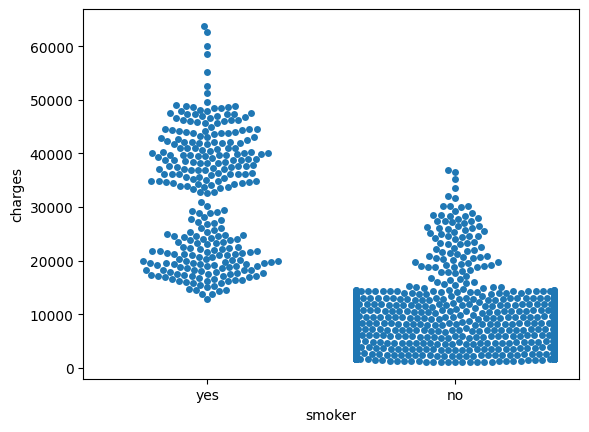

In [8]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

Diantara hal-hal lainnya, plot ini menunjukkan kepada kita bahwa:

* Rata-rata, para non-perokok dikenakan biaya lebih rendah daripada perokok.
* Pelanggan yang membayar paling banyak adalah perokok; sedangkan pelanggan yang membayar paling sedikit adalah non-perokok.